### DATA CLEANING AND EXPLORATORY DATA ANALYSIS ON ONLINE RETAIL DATASET OBTAINED FROM KAGGLE

In [8]:
#connecting to google colab to enable parallel processing with GPUs
!pip install jupyter_http_over_ws
!jupyter serverextension enable --py jupyter_http_over_ws

Defaulting to user installation because normal site-packages is not writeable
Enabling: jupyter_http_over_ws
- Writing config: /home/einstein/.jupyter
    - Validating...
      jupyter_http_over_ws 0.0.7 OK


In [ ]:
!jupyter notebook \
  --NotebookApp.allow_origin='https://colab.research.google.com' \
  --port=9999 \
  --NotebookApp.port_retries=0

jupyter_http_over_ws extension initialized. Listening on /http_over_websocket
[I 16:40:12.184 NotebookApp] Serving notebooks from local directory: /home/einstein/Desktop/courseWork
[I 16:40:12.184 NotebookApp] Jupyter Notebook 6.4.8 is running at:
[I 16:40:12.184 NotebookApp] http://localhost:9999/?token=bcf8c2e6524ce1c5a5b4a9398d3acfbb12b9c712c5cb8233
[I 16:40:12.184 NotebookApp]  or http://127.0.0.1:9999/?token=bcf8c2e6524ce1c5a5b4a9398d3acfbb12b9c712c5cb8233
[I 16:40:12.184 NotebookApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
[C 16:40:12.214 NotebookApp] 
    
    To access the notebook, open this file in a browser:
        file:///home/einstein/.local/share/jupyter/runtime/nbserver-8839-open.html
    Or copy and paste one of these URLs:
        http://localhost:9999/?token=bcf8c2e6524ce1c5a5b4a9398d3acfbb12b9c712c5cb8233
     or http://127.0.0.1:9999/?token=bcf8c2e6524ce1c5a5b4a9398d3acfbb12b9c712c5cb8233
[I 16:40:32.650 NotebookApp

In [2]:
#We'll leverage python's pandas and numpy to help with data cleaning and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [3]:
#Creating a dataframe(df) out of our data using...
# work on UnicodeDecodeError
# This dataset is not good to work with its so large Half a million so it wont bring out better data visualization
df = pd.read_csv('OnlineRetail.csv', encoding="ISO-8859-1")

##### General overview of our data

In [3]:
#Getting a general overview of our data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


#### General mathematical overview of the data

In [4]:
df.describe()
#?df

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


##### datatypes used in dataset

In [6]:
#getting number of datatypes used in dataset
def get_data_type_counts()->int:
    count = 0
    for i in df.dtypes:
        count=count+1
    return count
 
print("The Dataset contains {} datatypes".format(get_data_type_counts()))
df.dtypes

The Dataset contains 8 datatypes


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
#function for calculating the null values in each column
columns = df.columns
def calculate_nulls(columns) -> str:
    for column in columns:
        print("{}:{} nulls".format(column, df[column].isnull().sum()))
calculate_nulls(columns)

InvoiceNo:0 nulls
StockCode:0 nulls
Description:1454 nulls
Quantity:0 nulls
InvoiceDate:0 nulls
UnitPrice:0 nulls
CustomerID:135080 nulls
Country:0 nulls


In [7]:
#Getting value counts for the most 50 common values of our dataset
columns = df.columns
def get_value_counts(columns) -> str:
    for column in columns:
        print("{}".format(column))
        print("{}\n".format(df[column].value_counts().head(n=50)))
get_value_counts(columns)

InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
579777     687
581217     676
537434     675
580730     662
538071     652
580367     650
580115     645
581439     635
580983     629
578344     622
538349     620
578347     606
537638     601
537237     597
536876     593
576617     593
536592     592
537823     591
576837     585
579508     578
577078     572
537240     568
577358     561
576618     552
576840     544
576339     542
579187     541
537666     536
538177     534
579196     533
580727     529
536544     527
578844     527
575930     526
577768     526
578827     520
576329     518
575176     518
539437     518
575477     515
539958     512
579512     503
575875     503
540551     502
578065     494
Name: InvoiceNo, dtype: int64

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
22383     1348
22457     1280
23203     1267
POST

In [11]:
#we are gonna drop all entries with a null Description since they are just 1454 a small value to lose
#We will fill null values of CustomerID since they are 135,080 with random samples from the existing customer ids
#its a large amount of data to lose

# We create a copy of the online retail object, as we want to keep the original how we initially had it.
copy_of_online_retail = df.copy()
copy_of_online_retail.dropna(subset="Description", how="all", inplace = True)

In [12]:
#Dropping null columns of Description
copy_of_online_retail.dropna(subset="Description", how="all", inplace = True)

In [13]:
#Checking null values
columns = copy_of_online_retail.columns
def calculate_nulls(columns) -> str:
    for column in columns:
        print("{}:{} nulls".format(column, copy_of_online_retail[column].isnull().sum()))
calculate_nulls(columns)

InvoiceNo:0 nulls
StockCode:0 nulls
Description:0 nulls
Quantity:0 nulls
InvoiceDate:0 nulls
UnitPrice:0 nulls
CustomerID:133626 nulls
Country:0 nulls


In [14]:
#filling null values of CustomerID with random samples from the existing customer ids
copy_of_online_retail.fillna(value=np.random.choice(copy_of_online_retail["CustomerID"]), inplace=True)

In [15]:
#Checking null values
columns = copy_of_online_retail.columns
def calculate_nulls(columns) -> str:
    for column in columns:
        print("{}:{} nulls".format(column, copy_of_online_retail[column].isnull().sum()))
calculate_nulls(columns)

InvoiceNo:0 nulls
StockCode:0 nulls
Description:0 nulls
Quantity:0 nulls
InvoiceDate:0 nulls
UnitPrice:0 nulls
CustomerID:0 nulls
Country:0 nulls


### Plotting of our data

In [14]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


#### Histograms of our data

#### PIECHARTS FOR OUR DATA

In [33]:
### GET SOME HIGHER RAM TO RUN THIS UNLESS YOU WANT TO FREEZE YOUR COMPUTER YOUR COMPUTER--> run in colab
columns = copy_of_online_retail.columns
def plot_hists(columns):
    for column in columns:
        plt.hist(copy_of_online_retail[columns])
        plt.yscale('log')
        plt.show()
plot_hists(columns)

NameError: name 'train' is not defined

In [ ]:
### GET SOME HIGHER RAM TO RUN THIS UNLESS YOU WANT TO FREEZE YOUR COMPUTER YOUR COMPUTER--> run in colab
columns = copy_of_online_retail.columns
def plot_charts():
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    for column in columns:
        labels = []
        for val in copy_of_online_retail[column].tolist():
            if val not in labels:
                labels.append(val)
        ax.pie(copy_of_online_retail[column], labels = labels, autopct='%1.2f%%')
        plt.show()

### Heat maps

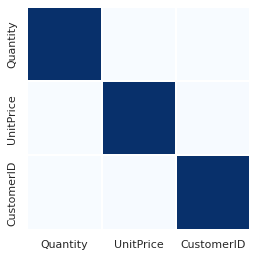

In [13]:
### Run a for loop throughout this data creating correlation matrixes between any two columns and then creating a heat map
##for example--> run a correlation matrix between Quantity and Unity Price and run a heat map
sns.set()
corr = copy_of_online_retail.corr()
ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

### Correlation matrix

<AxesSubplot:>

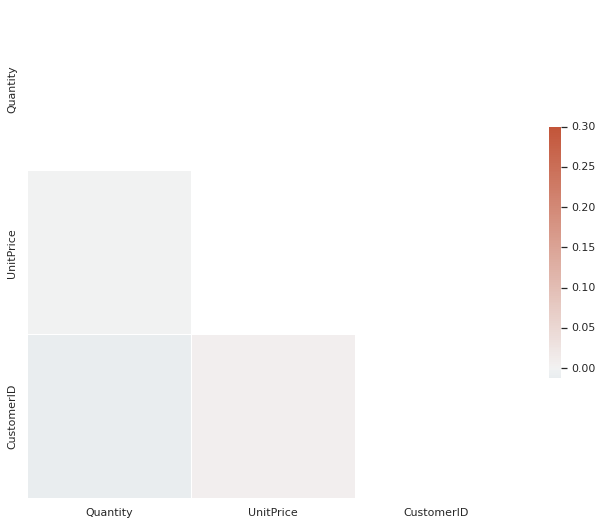

In [14]:
#try looking further into this :) pliz 
sns.set_theme(style="white")

# Compute the correlation matrix
corr = copy_of_online_retail.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Boxplots

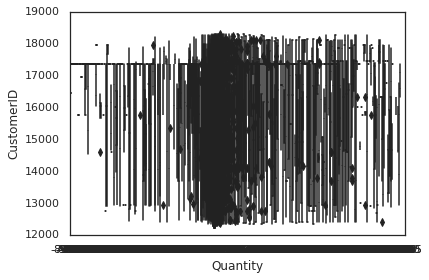

In [28]:
def plot_box_plots_for_numerics():
    columns = copy_of_online_retail.columns
    for column in columns:
        for column in columns:
## try increasing the size of the box plots for a better view
sns.boxplot(x=copy_of_online_retail["Quantity"], y=copy_of_online_retail["CustomerID"], width=0.9, palette="Blues");
plt.show()

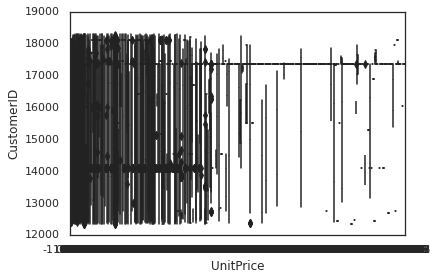

In [52]:
sns.boxplot(x=copy_of_online_retail["UnitPrice"], y=copy_of_online_retail["CustomerID"], width=0.9, palette="Blues");
plt.show()

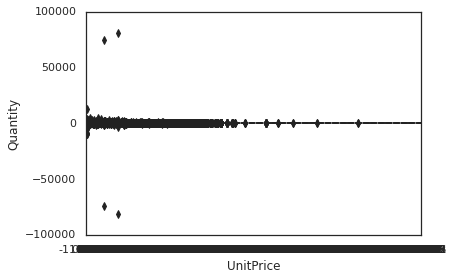

In [53]:
sns.boxplot(x=copy_of_online_retail["UnitPrice"], y=copy_of_online_retail["Quantity"], width=0.9, palette="Blues");
plt.show()

### Feature Independence Plots

In [ ]:
###Research on independent plots 

### Outlier Plots

In [ ]:
###You can plot simple graphs or use scikit learn to detect outliers

### Illustration of Trends in Time and Space

<AxesSubplot:xlabel='Quantity'>

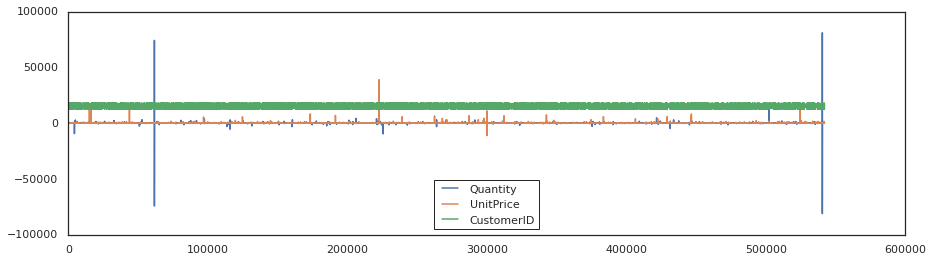

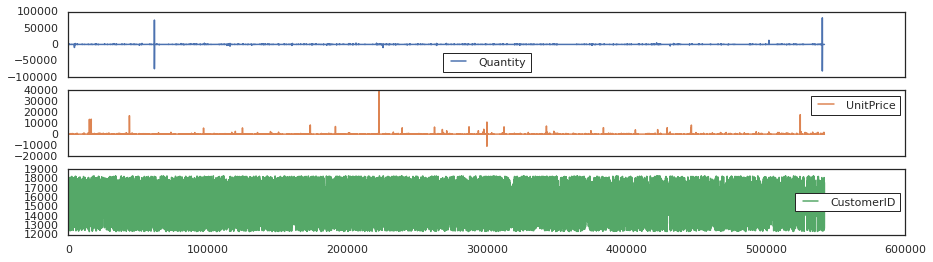

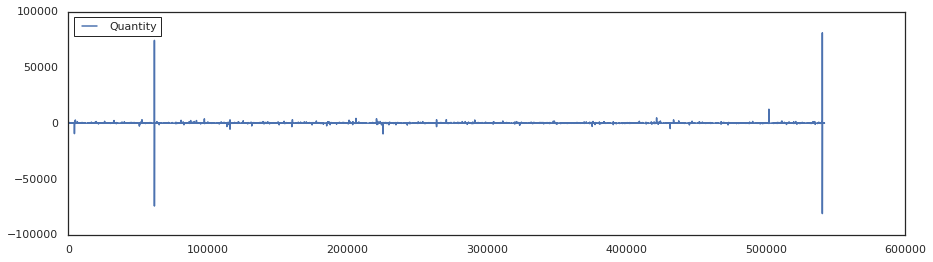

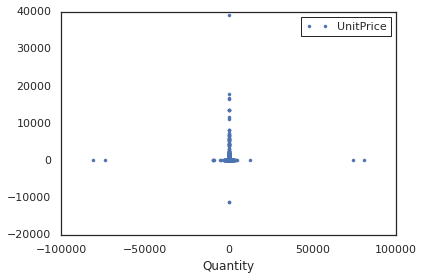

In [21]:
pd.to_datetime(copy_of_online_retail["InvoiceDate"])
copy_of_online_retail.plot(figsize=(15, 4))
copy_of_online_retail.plot(subplots=True, figsize=(15, 4))
copy_of_online_retail.plot(y=["Quantity", "InvoiceDate"], figsize=(15, 4))
copy_of_online_retail.plot(x="Quantity", y=["InvoiceDate", "UnitPrice"], style='.')